In [1]:
pwd


'C:\\Users\\whpvm\\Desktop\\TenProject\\tenprojectML'

In [2]:
mkdir src


In [3]:
ls


 Volume in drive C has no label.
 Volume Serial Number is 4213-7047

 Directory of C:\Users\whpvm\Desktop\TenProject\tenprojectML

24/03/2020  23:52    <DIR>          .
24/03/2020  23:52    <DIR>          ..
24/03/2020  23:50    <DIR>          .ipynb_checkpoints
24/03/2020  23:52               909 Iris.ipynb
24/03/2020  23:52    <DIR>          src
               1 File(s)            909 bytes
               4 Dir(s)   9,941,762,048 bytes free


In [4]:
cd src


C:\Users\whpvm\Desktop\TenProject\tenprojectML\src


In [5]:
mkdir data

In [6]:
ls


 Volume in drive C has no label.
 Volume Serial Number is 4213-7047

 Directory of C:\Users\whpvm\Desktop\TenProject\tenprojectML\src

24/03/2020  23:53    <DIR>          .
24/03/2020  23:53    <DIR>          ..
24/03/2020  23:53    <DIR>          data
               0 File(s)              0 bytes
               3 Dir(s)   9,653,096,448 bytes free


In [8]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4213-7047

 Directory of C:\Users\whpvm\Desktop\TenProject\tenprojectML\src

24/03/2020  23:53    <DIR>          .
24/03/2020  23:53    <DIR>          ..
24/03/2020  23:53    <DIR>          data
               0 File(s)              0 bytes
               3 Dir(s)   9,552,224,256 bytes free


In [9]:
cd data


C:\Users\whpvm\Desktop\TenProject\tenprojectML\src\data


In [10]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4213-7047

 Directory of C:\Users\whpvm\Desktop\TenProject\tenprojectML\src\data

24/03/2020  23:55    <DIR>          .
24/03/2020  23:55    <DIR>          ..
24/03/2020  23:55             4,551 iris.data
               1 File(s)          4,551 bytes
               2 Dir(s)   8,800,579,584 bytes free


In [11]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [13]:
url = r'C:\Users\whpvm\Desktop\TenProject\tenprojectML\src\data\iris.data'

In [14]:
names = ['sepal_lenght','sepal_width','pepal_lenght','pepal_width','Y']

In [20]:
# đọc file
dataframe = read_csv(url, names=names)

In [18]:
# lấy ra 10 giá trị đầu
dataframe.head(10)

,sepal_lenght,sepal_width,pepal_lenght,pepal_width,Y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
dataframe.shape

(150, 5)

In [22]:
dataframe.describe()

,sepal_lenght,sepal_width,pepal_lenght,pepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
dataframe.groupby('Y').size()

Y
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

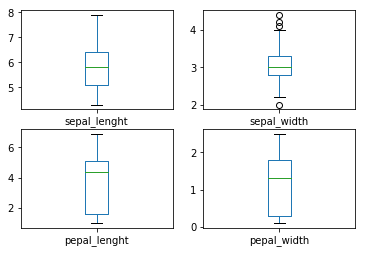

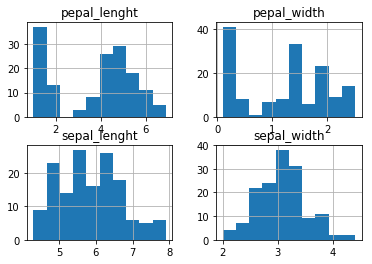

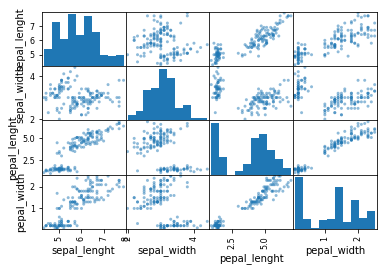

In [25]:
# box and whisker plots
dataframe.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# histograms
dataframe.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(dataframe)
pyplot.show()

('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))
LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
CART: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


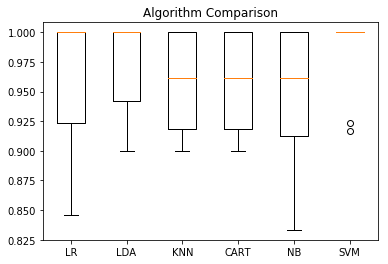

In [27]:
array = dataframe.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [28]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [29]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

